In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
from astropy.convolution import Gaussian2DKernel
#import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
#from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy
from scipy.signal import convolve2d

In [2]:
lofar_orig = Table.read('../data/data_release/final_cross_match_catalogue-v1.0.fits')
print(len(lofar_orig))
lofar_orig[0]

31610


Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,i_flux_corr,i_fluxerr_corr,i_mag_corr,i_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,g_hsc_flux_corr,g_hsc_fluxerr_corr,g_hsc_mag_corr,g_hsc_magerr_corr,r_hsc_flux_corr,r_hsc_fluxerr_corr,r_hsc_mag_corr,r_hsc_magerr_corr,i_hsc_flux_corr,i_hsc_fluxerr_corr,i_hsc_mag_corr,i_hsc_magerr_corr,z_hsc_flux_corr,z_hsc_fluxerr_corr,z_hsc_mag_corr,z_hsc_magerr_corr,y_hsc_flux_corr,y_hsc_fluxerr_corr,y_hsc_mag_corr,y_hsc_magerr_corr,nb921_hsc_flux_corr,nb921_hsc_fluxerr_corr,nb921_hsc_mag_corr,nb921_hsc_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,2RXS_ID,XMMSL2_ID,ap_to_model_g,ap_to_model_err_g,ap_to_model_r,ap_to_model_err_r,ap_to_model_z,ap_to_model_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,Nfilts,u_rest,g_rest,r_rest,i_rest,z_rest,y_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,XID+_rerun_mips,XID+_rerun_pacs,XID+_rerun_SPIRE
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,f

In [301]:
fname = '../data/radio_images/image_full_ampphase_di_m.NS.psf.fits'
hdulist = fits.open(fname)
radim_header_psf = hdulist[0].header
radim_wcs_psf = wcs.WCS(radim_header_psf).celestial
radim_data_psf = hdulist[0].data[0][0]
radim_pixsize = abs(radim_wcs_psf.wcs.cdelt[0])*3600
hdulist.close()

fname = '../data/radio_images/image_full_ampphase_di_m.NS.int.restored.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0].astype('f4') #convert to mJy
hdulist.close()
radim_header['NAXIS']=2
radim_header['WCSAXES']=2

fname = '../data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header_image = hdulist[0].header
radim_image_wcs = wcs.WCS(radim_header_image).celestial
radim_image = hdulist[0].data[0][0].astype('f4') #convert to mJy
hdulist.close()


fname = '../data/data_release/radio_rms_image.fits'
hdulist = fits.open(fname)
radim_header_err = hdulist[0].header
radim_wcs_err = wcs.WCS(radim_header_err).celestial
radim_err = hdulist[0].data[0][0].astype('f4') #convert to mJy
hdulist.close()

fname = '../data/radio_images/image_full_ampphase_di_m.NS.int.model.fits'
hdulist = fits.open(fname)
radim_header_model = hdulist[0].header
radim_model_wcs = wcs.WCS(radim_header_model).celestial
radim_model = hdulist[0].data[0][0]
hdulist.close()

fname = '../data/radio_images/image_full_ampphase_di_m.NS.int.residual.fits'
hdulist = fits.open(fname)
radim_header_residual = hdulist[0].header
radim_residual_wcs = wcs.WCS(radim_header_residual).celestial
radim_residual = hdulist[0].data[0][0]
hdulist.close()

fname = '../data/radio_images/image_full_ampphase_di_m.NS.mask.fits'
hdulist = fits.open(fname)
radim_header_mask = hdulist[0].header
mask_deconv_wcs = wcs.WCS(radim_header_mask).celestial
mask_deconv = hdulist[0].data[0][0]
hdulist.close()

  'HZ' -> 'Hz'. [astropy.wcs.wcs]
  'HZ' -> 'Hz'.


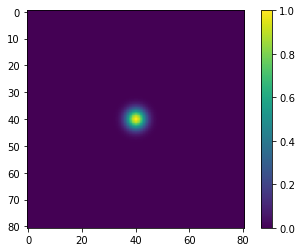

In [82]:
#generate a psf for the first object in the catalogue 
n = 1
n_size = 81

sig_maj = 6/2.355
sig_min = 6/2.355


prf = Gaussian2DKernel(sig_maj,sig_min,x_size=n_size,y_size=n_size)
prf.normalize(mode='peak')

plt.imshow(prf.array)
plt.colorbar()
plt.show()



In [83]:
prf.array.max()

1.0

239.98990167026162 55.01456045936245


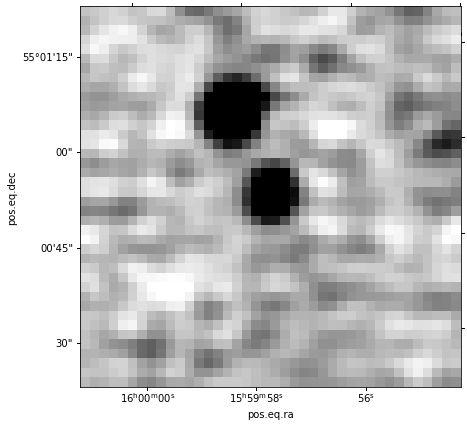

239.98990167026162 55.01456045936245


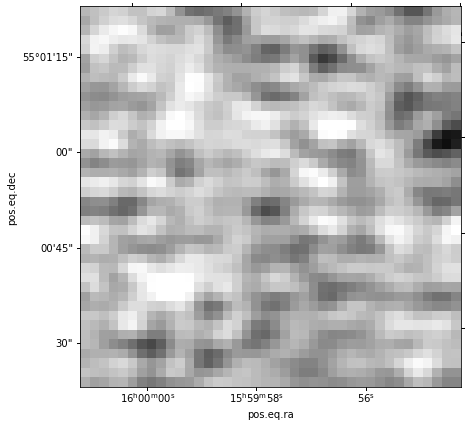

In [49]:
ra = lofar_orig[0]['RA']
dec = lofar_orig['DEC'][0]

box_length = 1/60
fig = plt.figure(figsize=[7,7])
print(ra,dec)
image_plotting.image_plot(radim_data,ra,dec,radim_wcs,box_length,fig)
plt.show()

fig = plt.figure(figsize=[7,7])
print(ra,dec)
image_plotting.image_plot(radim_residual,ra,dec,radim_residual_wcs,box_length,fig)
plt.show()

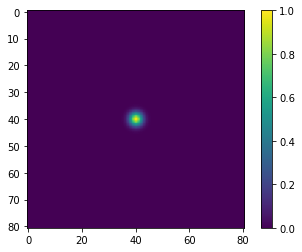

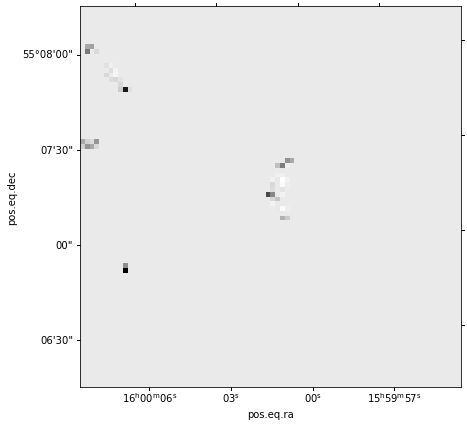

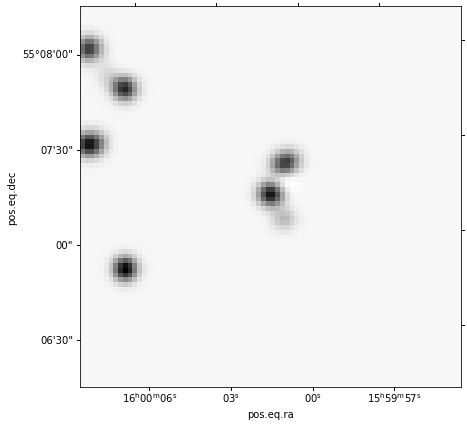

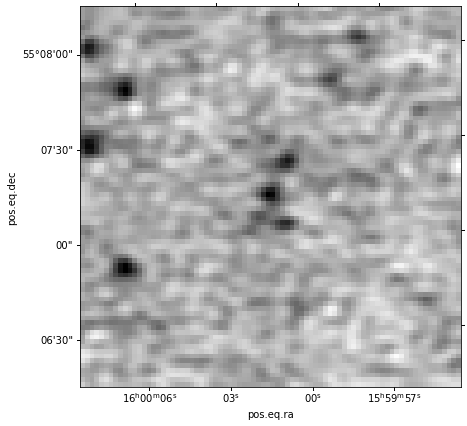

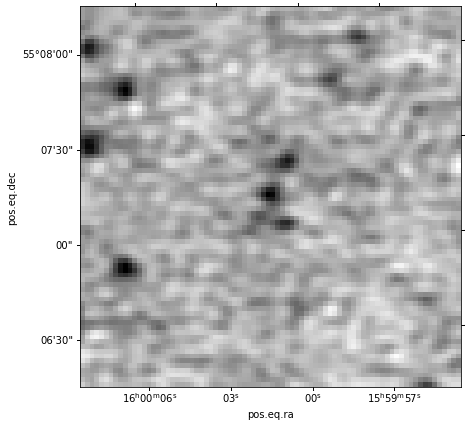

6.878396e-05
0.0002017416115441687
0.000195926382001819
0.00020173988
1.2429926846478163e-07


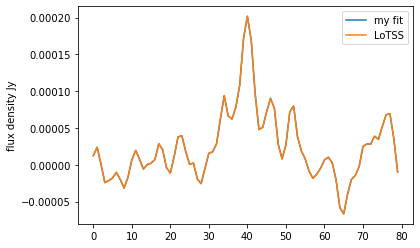

In [302]:
#generate a psf for the first object in the catalogue 
n = 5
n_size = 81
FWHM_factor = 2*np.sqrt(2*np.log(2))
sig_maj = 4/FWHM_factor#/2.355
sig_min = 6/2.355


prf = Gaussian2DKernel(sig_maj,x_size=n_size,y_size=n_size)
prf.normalize(mode='peak')

plt.imshow(prf.array)
plt.colorbar()
plt.show()



ra = lofar_orig['RA'][n]
dec = lofar_orig['DEC'][n]
box_length = 1/30
c = SkyCoord(ra*u.degree,dec*u.degree,unit='deg')

imgcut_model = Cutout2D(radim_model, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_model_wcs)
wcscut_model = imgcut_model.wcs
imgcut_model = imgcut_model.data

imgcut_res = Cutout2D(radim_residual, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_residual_wcs)
wcscut_res = imgcut_res.wcs
imgcut_res = imgcut_res.data

prf_factor=1.0#0.87
convolvedimg = convolve2d(imgcut_model,prf*prf_factor,mode='same')

cmap = 'binary'
origin = 'lower'

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(imgcut_model, cmap=cmap, interpolation='nearest', origin=origin)
plt.show()

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(convolvedimg, cmap=cmap, interpolation='nearest', origin=origin)
plt.show()

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(convolvedimg+imgcut_res, cmap=cmap, interpolation='nearest', origin=origin)
plt.show()


imgcut_final = Cutout2D(radim_data, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_wcs)
wcscut_final = imgcut_final.wcs
imgcut_final = imgcut_final.data
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(imgcut_final, cmap=cmap, interpolation='nearest', origin=origin)
plt.show()

test = convolvedimg+imgcut_res
nwidth = int(imgcut_model.shape[0]/2)
nheight = int(imgcut_model.shape[1]/2)
print(imgcut_model[nwidth,nheight])
print(test[nwidth,nheight])
print(convolvedimg[nwidth,nheight])
print(imgcut_final[nwidth,nheight])

print(np.sum((imgcut_final-test)**2))

test_row = test[:,nheight]
true_row = imgcut_final[:,nheight]
y = test_row
plt.plot(y,label='my fit')
y = true_row
plt.plot(y,label='LoTSS')
plt.ylabel('flux density Jy')
#plt.xlim(30,50)
plt.legend()
plt.show()

6.878396e-05
0.0002017416115441687
0.000195926382001819
0.00020173988
1.2429926846478163e-07


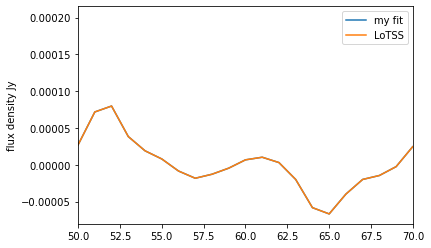

In [303]:
test = convolvedimg+imgcut_res
nwidth = int(imgcut_model.shape[0]/2)
nheight = int(imgcut_model.shape[1]/2)
print(imgcut_model[nwidth,nheight])
print(test[nwidth,nheight])
print(convolvedimg[nwidth,nheight])
print(imgcut_final[nwidth,nheight])

print(np.sum((imgcut_final-test)**2))

test_row = test[:,nheight]
true_row = imgcut_final[:,nheight]
y = test_row
plt.plot(y,label='my fit')
y = true_row
plt.plot(y,label='LoTSS')
plt.ylabel('flux density Jy')
plt.xlim(50,70)
plt.legend()
plt.show()

## Create a catalogue that contains all the model maps delta functions

In [356]:
pixx,pixy = np.where(radim_model>0)
fluxes = radim_model[pixy,pixx]

In [362]:
coords = radim_model_wcs.pixel_to_world(pixy,pixx)
ras = coords.ra.value
decs = coords.dec.value
IDs = np.arange(0,len(ras)).astype(str)

col_ra = Column(name='ra',data=ras)
col_dec = Column(name='dec',data=decs)
col_ID = Column(name='id',data=IDs)

In [363]:
prior_cat_model = Table()
prior_cat_model.add_columns([col_ID,col_ra,col_dec])

In [364]:
prior_cat_model

id,ra,dec
str21,float64,float64
0,236.52111070583965,50.6899849658501
1,236.52045405659334,50.68994774609017
2,236.5197974080884,50.68991052240344
3,236.519140760325,50.689873294789884
4,236.52302518435866,50.690512879416964
5,236.5223685271073,50.69047567112707
6,236.5217118705971,50.6904384589103
7,236.52105521482818,50.69040124276666
8,236.5203985598006,50.6903640226962


In [365]:
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(prior_cat_model, None):
            registry.write(prior_cat_model, 'data/prior_cat_model.fits',format='fits',overwrite=True)

## Compare fluxes of model sources to the PYBDSF fluxes

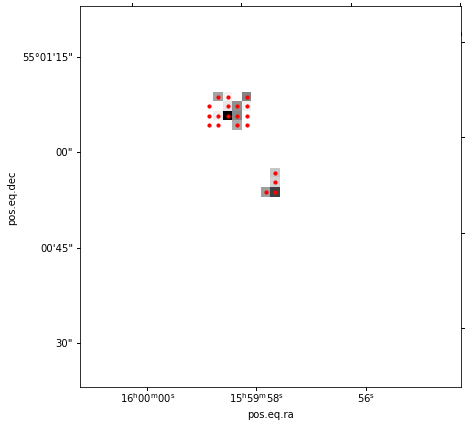

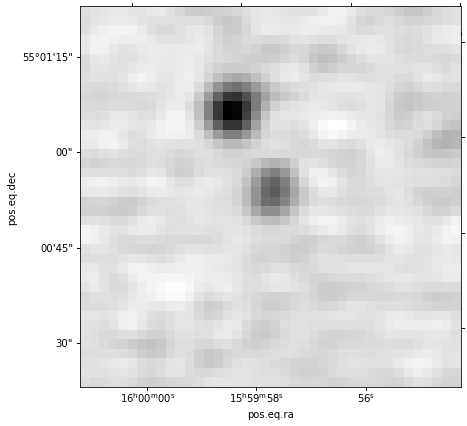

0.27660207162471256


In [367]:
#generate a psf for the first object in the catalogue 
n=0
ra = lofar_orig['RA'][n]
dec = lofar_orig['DEC'][n]
box_length = 1/60
c = SkyCoord(ra*u.degree,dec*u.degree,unit='deg')



imgcut_model = Cutout2D(radim_model, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_model_wcs)
wcscut_model = imgcut_model.wcs
imgcut_model = imgcut_model.data


cmap = 'binary'
origin = 'lower'

from astropy.coordinates import SkyCoord
from astropy import units as u
#c = SkyCoord(ra=ras*u.degree, dec=decs*u.degree)  
import pymoc
moc=pymoc.util.catalog.catalog_to_moc(c,30,15)

mask = inMoc(prior_cat_model['ra'],prior_cat_model['dec'],moc)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(imgcut_model, cmap=cmap, interpolation='nearest', origin=origin)
ax.scatter(prior_cat_model['ra'][mask],prior_cat_model['dec'][mask],s=10,c='red',transform=ax.get_transform('world'))
plt.show()

imgcut_final = Cutout2D(radim_data, c, size=[box_length*u.degree,box_length*u.degree], wcs=radim_wcs)
wcscut_final = imgcut_final.wcs
imgcut_final = imgcut_final.data
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=wcscut_model)
ax.imshow(imgcut_final, cmap=cmap, interpolation='nearest', origin=origin)
plt.show()


flux_pybdsf = lofar_orig['Total_flux'][n]
flux_model = np.sum(imgcut_model)

print(flux_pybdsf/flux_model)

plotting 1 sources


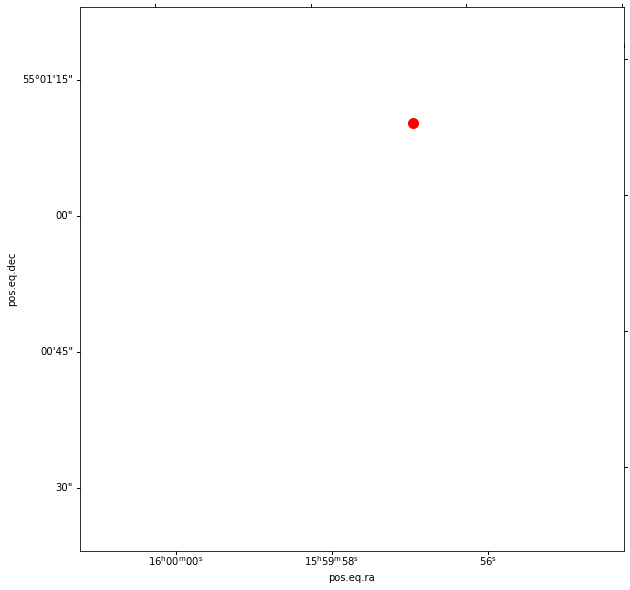

In [347]:
plot_params = {'marker':'o',
              'col':'red',
              'size':100,
              'box_length':1/60,
              'use_redshift':False}

image_plotting.plot_figure(radim_model,prior_cat_model,radim_model_wcs,ra,dec,plot_params)